<a href="https://colab.research.google.com/github/eduardo-mendiola/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##Ingreso total por cada tienda

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [2]:
def calculo_ingresos(tienda):
  return tienda['Precio'].sum()

In [3]:
# Creo una lista de lista para poder iterar
tiendas = [tienda, tienda2, tienda3, tienda4]

for i in range(len(tiendas)):
    ingreso = calculo_ingresos(tiendas[i])
    print(f'El ingreso total de la tienda {i + 1} es de: ${ingreso:,.2f}')


El ingreso total de la tienda 1 es de: $1,150,880,400.00
El ingreso total de la tienda 2 es de: $1,116,343,500.00
El ingreso total de la tienda 3 es de: $1,098,019,600.00
El ingreso total de la tienda 4 es de: $1,038,375,700.00


In [4]:
ingreso_tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(ingreso_tiendas, start=1):
  ingreso = calculo_ingresos(t)
  print(f'El ingreso total de la tienda {i} es de: ${ingreso:,.2f}')

El ingreso total de la tienda 1 es de: $1,150,880,400.00
El ingreso total de la tienda 2 es de: $1,116,343,500.00
El ingreso total de la tienda 3 es de: $1,098,019,600.00
El ingreso total de la tienda 4 es de: $1,038,375,700.00


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [5]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [6]:
def cont_prod_vendidos(df_tienda):
    categorias = df_tienda['Categoría del Producto'].unique() # Separo las categorias con la función unique()
    resultado = {}
    for categoria in categorias:
        cantidad = len(df_tienda[df_tienda['Categoría del Producto'] == categoria])
        resultado[categoria] = cantidad
    resultado_ordenado = dict(sorted(resultado.items(), key=lambda x: x[1], reverse=True))
    top_3 = dict(list(resultado_ordenado.items())[:3])
    return top_3

In [7]:
cant_venta_tienda1 = cont_prod_vendidos(tienda)
cant_venta_tienda2 = cont_prod_vendidos(tienda2)
cant_venta_tienda3 = cont_prod_vendidos(tienda3)
cant_venta_tienda4 = cont_prod_vendidos(tienda4)

In [8]:
cant_ventas_tiendas = [cant_venta_tienda1, cant_venta_tienda2, cant_venta_tienda3, cant_venta_tienda4]

for i, t in enumerate(cant_ventas_tiendas, start=1):
  print(f'El top 3 de productos más vendidos de la tienda {i} es: {t}')


El top 3 de productos más vendidos de la tienda 1 es: {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324}
El top 3 de productos más vendidos de la tienda 2 es: {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313}
El top 3 de productos más vendidos de la tienda 3 es: {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315}
El top 3 de productos más vendidos de la tienda 4 es: {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338}


# 3. Calificación promedio de la tienda


## Valoración media por tienda
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [9]:
def calculo_promedio_calificacion(tienda):
  return sum(tienda['Calificación']) / len(tienda['Calificación'])


In [10]:
promedio_calificacion_tienda1 = calculo_promedio_calificacion(tienda)
promedio_calificacion_tienda2 = calculo_promedio_calificacion(tienda2)
promedio_calificacion_tienda3 = calculo_promedio_calificacion(tienda3)
promedio_calificacion_tienda4 = calculo_promedio_calificacion(tienda4)

In [11]:
promedios_calificaciones = [promedio_calificacion_tienda1, promedio_calificacion_tienda2, promedio_calificacion_tienda3, promedio_calificacion_tienda4]

for i, t in enumerate(promedios_calificaciones, start=1):
  print(f'El promedio de calificación de la tienda {i} es de: {t:.2f}')

El promedio de calificación de la tienda 1 es de: 3.98
El promedio de calificación de la tienda 2 es de: 4.04
El promedio de calificación de la tienda 3 es de: 4.05
El promedio de calificación de la tienda 4 es de: 4.00


In [12]:
#tienda1.describe()

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [13]:
def max_min_vendidos(df_tienda):
    categorias = df_tienda['Categoría del Producto'].unique()
    resultado = {}
    for categoria in categorias:
        cantidad = len(df_tienda[df_tienda['Categoría del Producto'] == categoria])
        resultado[categoria] = cantidad
    categoria_max = max(resultado, key=resultado.get)
    categoria_min = min(resultado, key=resultado.get)
    return ((categoria_max, resultado[categoria_max]),(categoria_min, resultado[categoria_min]))

In [14]:
max_min_tienda1 = max_min_vendidos(tienda)
max_min_tienda2 = max_min_vendidos(tienda2)
max_min_tienda3 = max_min_vendidos(tienda3)
max_min_tienda4 = max_min_vendidos(tienda4)


In [15]:
max_min_tiendas = [max_min_tienda1, max_min_tienda2, max_min_tienda3, max_min_tienda4]
for i, t in enumerate(max_min_tiendas, start=1):
  print(f'Los productos mas y menos vendidos dela tienda {i} son: {t}')

Los productos mas y menos vendidos dela tienda 1 son: (('Muebles', 465), ('Artículos para el hogar', 171))
Los productos mas y menos vendidos dela tienda 2 son: (('Muebles', 442), ('Artículos para el hogar', 181))
Los productos mas y menos vendidos dela tienda 3 son: (('Muebles', 499), ('Instrumentos musicales', 177))
Los productos mas y menos vendidos dela tienda 4 son: (('Muebles', 480), ('Instrumentos musicales', 170))


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [16]:
def calculo_promedio_envio(tienda):
  return sum(tienda['Costo de envío']) / len(tienda['Costo de envío'])

In [17]:
promedio_costo_envio_tienda1 = calculo_promedio_envio(tienda)
promedio_costo_envio_tienda2 = calculo_promedio_envio(tienda2)
promedio_costo_envio_tienda3 = calculo_promedio_envio(tienda3)
promedio_costo_envio_tienda4 = calculo_promedio_envio(tienda4)

In [18]:
promedios_costos_envios = [promedio_costo_envio_tienda1, promedio_costo_envio_tienda2, promedio_costo_envio_tienda3, promedio_costo_envio_tienda4]

for i, t in enumerate(promedios_costos_envios, start=1):
  print(f'El promedio de costos de envío de la tienda {i} es de: ${t:.2f}')

El promedio de costos de envío de la tienda 1 es de: $26018.61
El promedio de costos de envío de la tienda 2 es de: $25216.24
El promedio de costos de envío de la tienda 3 es de: $24805.68
El promedio de costos de envío de la tienda 4 es de: $23459.46


## Generando gráfico

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

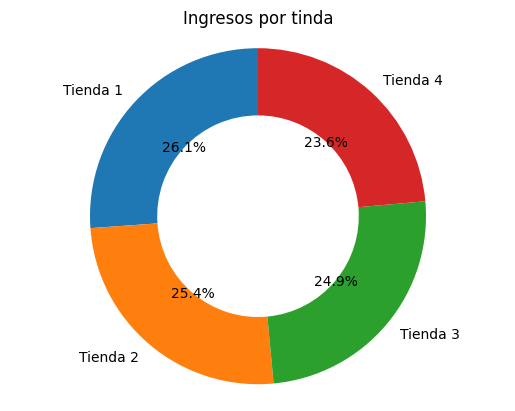

In [19]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [calculo_ingresos(t) for t in tiendas]

# Pie with a hole in the middle
plt.pie(ingresos, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('Ingresos por tinda')
plt.axis('equal')
plt.show()

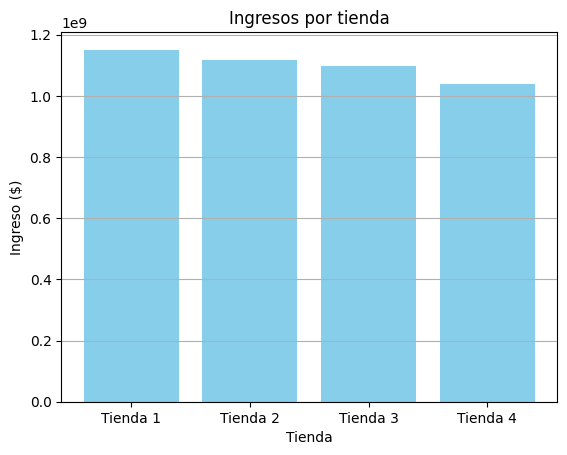

In [20]:
plt.bar(nombres_tiendas, ingresos, color='skyblue')
plt.title('Ingresos por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y')
plt.show()


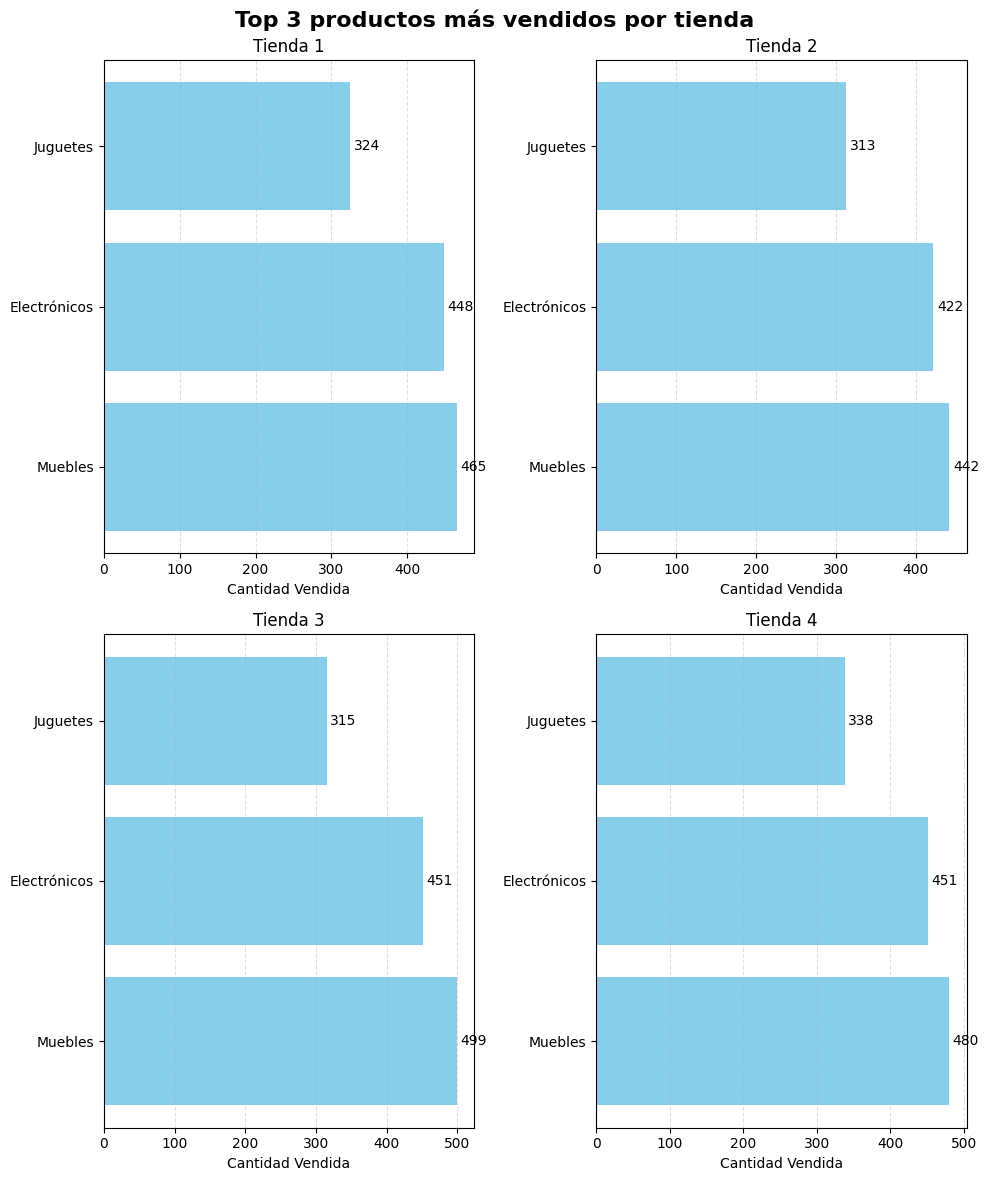

In [21]:
# Crear figura
plt.figure(figsize=(10, 12))
plt.suptitle("Top 3 productos más vendidos por tienda", fontsize=16, fontweight='bold')
for i, t in enumerate(tiendas, start=1):
    top_3 = cont_prod_vendidos(t)
    categorias = list(top_3.keys())
    cantidades = list(top_3.values())

    # Subplot para cada tienda
    plt.subplot(2, 2, i)
    bars = plt.barh(categorias, cantidades, color='skyblue')
    plt.title(nombres_tiendas[i-1])
    plt.xlabel('Cantidad Vendida')
    plt.grid(axis='x', linestyle='--', alpha=0.4)

    # Etiquetas de valor a la derecha de cada barra
    for bar in bars:
        ancho = bar.get_width()
        plt.text(ancho + 5, bar.get_y() + bar.get_height() / 2,
                 f'{int(ancho)}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

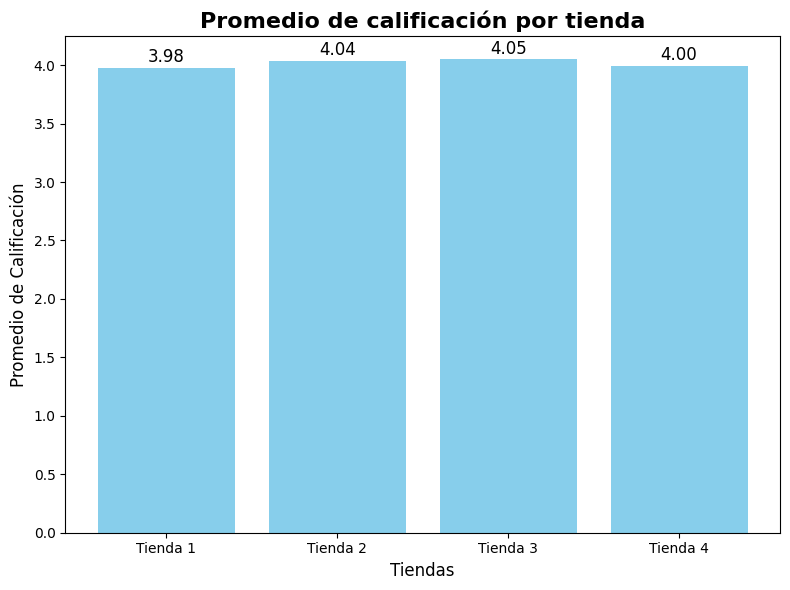

In [22]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, promedios_calificaciones, color='skyblue')

# Títulos y etiquetas
plt.title("Promedio de calificación por tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Promedio de Calificación", fontsize=12)

# Mostrar las calificaciones encima de cada barra
for i, valor in enumerate(promedios_calificaciones):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

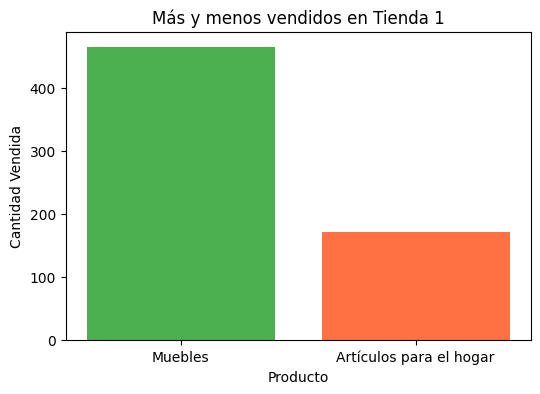

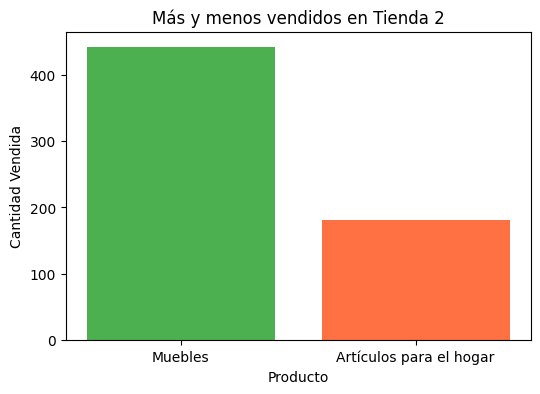

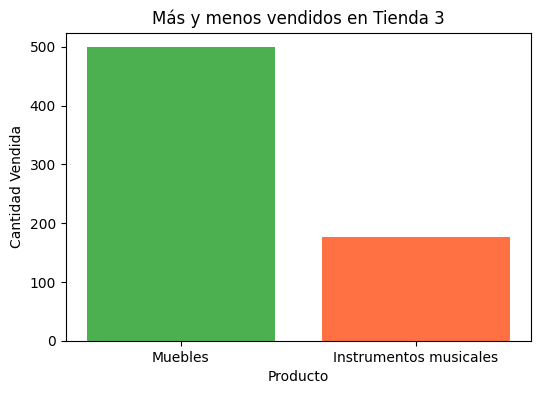

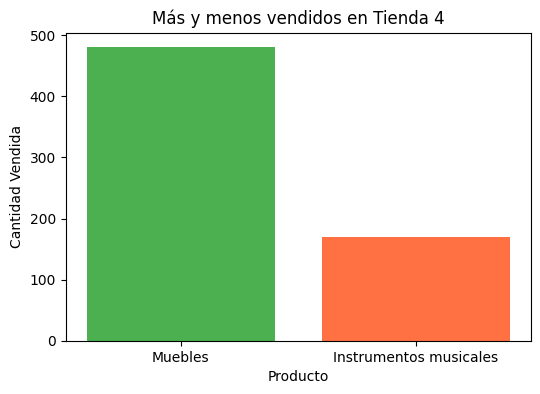

In [23]:
# Stacked bar chart for most and least sold products
def stacked_bar_chart_most_least_sold(max_min_tienda, tienda_number):
    categorias = [max_min_tienda[0][0], max_min_tienda[1][0]]
    cantidades = [max_min_tienda[0][1], max_min_tienda[1][1]]

    plt.figure(figsize=(6, 4))
    plt.bar(categorias, cantidades, color=['#4CAF50', '#FF7043'])
    plt.title(f'Más y menos vendidos en Tienda {tienda_number}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.show()

# Generate stacked bar charts for each store
for i, t in enumerate(max_min_tiendas, start=1):
    stacked_bar_chart_most_least_sold(t, i)


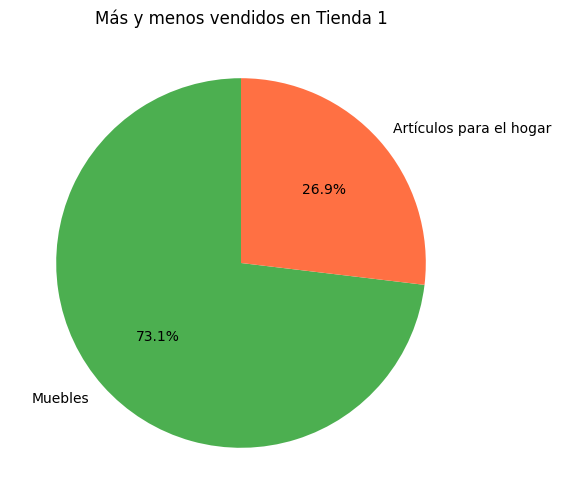

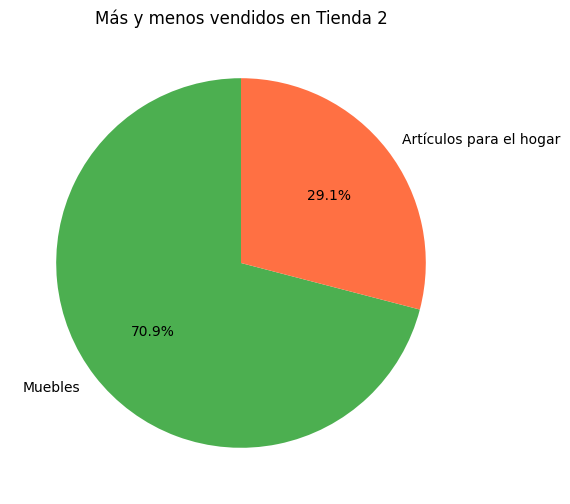

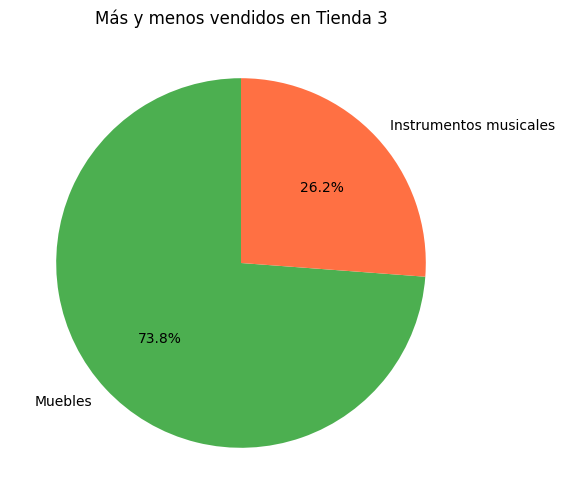

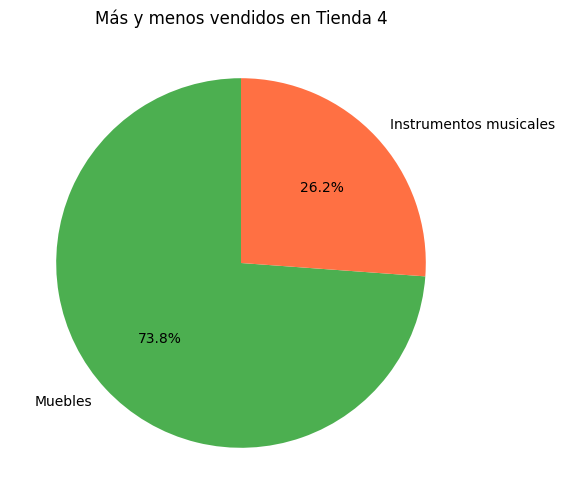

In [24]:
# Function to plot pie chart
def pie_chart_most_least_sold(max_min_tienda, tienda_number):
    categorias = [max_min_tienda[0][0], max_min_tienda[1][0]]
    cantidades = [max_min_tienda[0][1], max_min_tienda[1][1]]

    plt.figure(figsize=(6, 6))
    plt.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF7043'])
    plt.title(f'Más y menos vendidos en Tienda {tienda_number}')
    plt.show()

# Generate pie charts for each store
for i, t in enumerate(max_min_tiendas, start=1):
    pie_chart_most_least_sold(t, i)

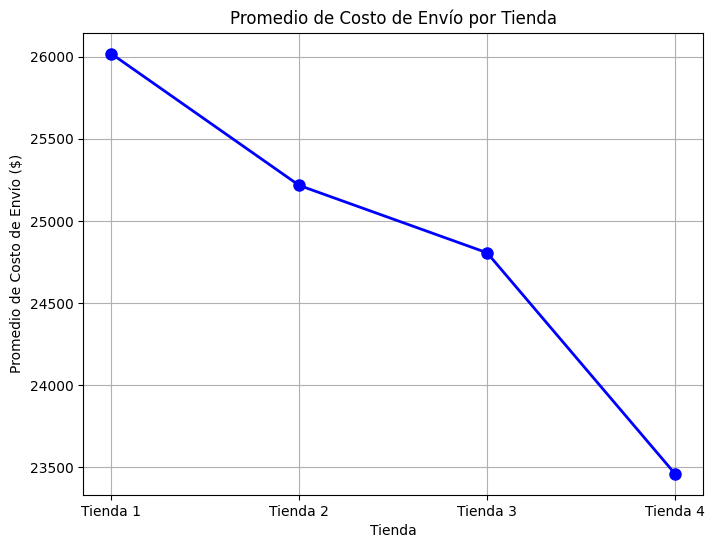

In [25]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(nombres_tiendas, promedios_costos_envios, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Promedio de Costo de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Costo de Envío ($)')
plt.grid(True)
plt.show()


## ¡Extra! Análisis del desempeño geográfico

Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.



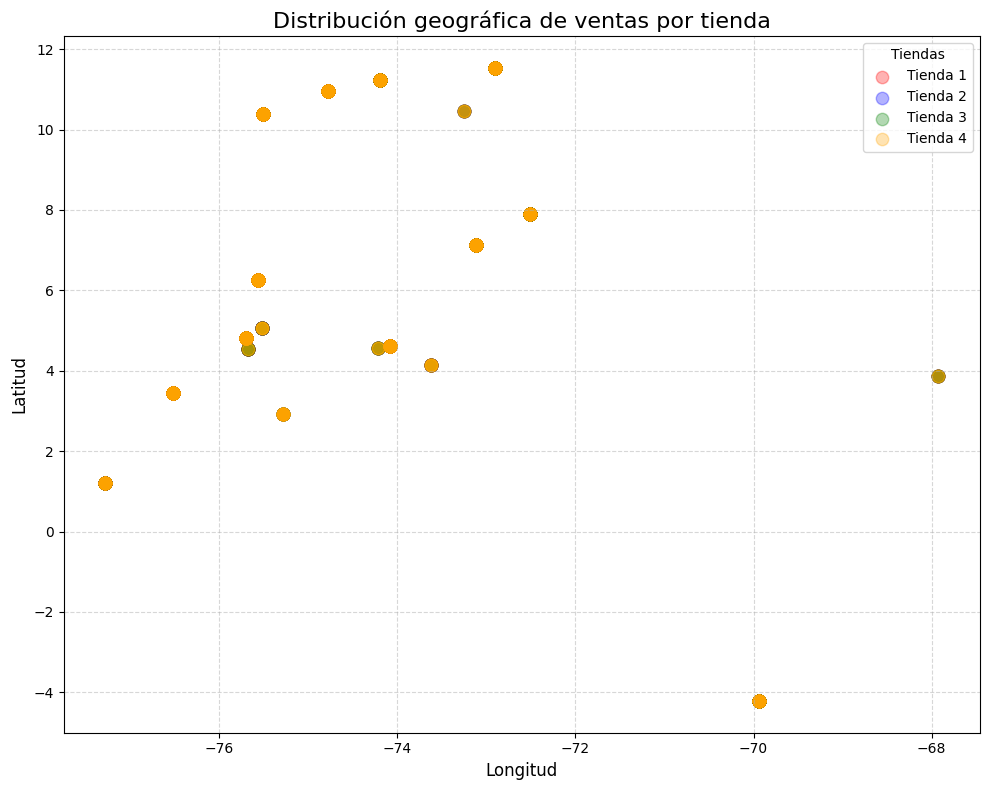

In [26]:
colors = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 8))

for i, t in enumerate(tiendas):
    plt.scatter(
        t['lon'],
        t['lat'],
        alpha=0.3,
        label=nombres_tiendas[i],
        color=colors[i],
        s=80
    )

plt.title('Distribución geográfica de ventas por tienda', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title="Tiendas")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [27]:
for i, t in enumerate(tiendas):
    print(f"{nombres_tiendas[i]}: {t[['lat', 'lon']].dropna().shape[0]} puntos")


Tienda 1: 2359 puntos
Tienda 2: 2359 puntos
Tienda 3: 2359 puntos
Tienda 4: 2358 puntos


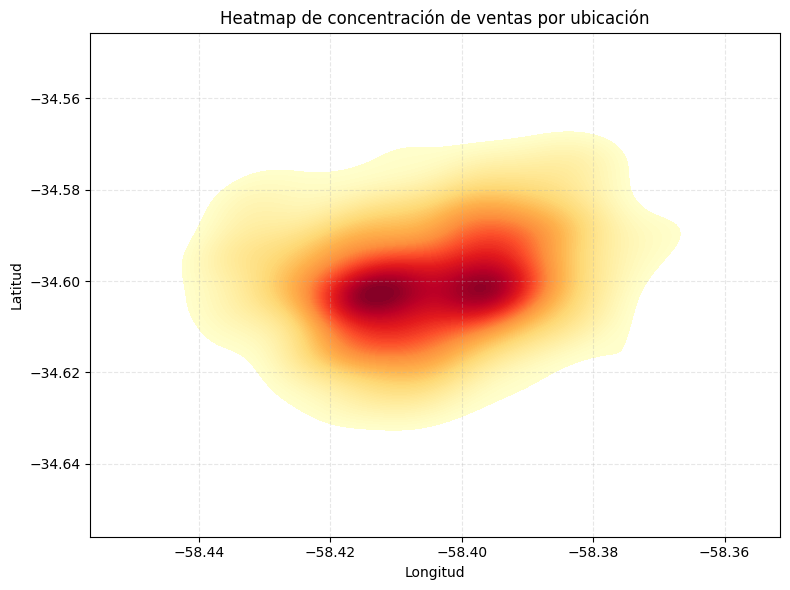

In [28]:
import seaborn as sns

# Simulamos algunos datos de latitud y longitud para cada tienda
import numpy as np

# Generamos datos aleatorios simulando latitudes y longitudes cercanas
np.random.seed(42)
tienda = pd.DataFrame({'lat': np.random.normal(-34.6, 0.01, 100), 'lon': np.random.normal(-58.4, 0.01, 100)})
tienda2 = pd.DataFrame({'lat': np.random.normal(-34.61, 0.01, 100), 'lon': np.random.normal(-58.41, 0.01, 100)})
tienda3 = pd.DataFrame({'lat': np.random.normal(-34.59, 0.01, 100), 'lon': np.random.normal(-58.39, 0.01, 100)})
tienda4 = pd.DataFrame({'lat': np.random.normal(-34.6, 0.01, 100), 'lon': np.random.normal(-58.42, 0.01, 100)})

# Combinamos todos los datos en un único DataFrame
todas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Creamos el heatmap
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=todas,
    x='lon',
    y='lat',
    cmap='YlOrRd',
    fill=True,
    thresh=0.05,
    levels=100
)
plt.title('Heatmap de concentración de ventas por ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Informe final

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

# Informe Final: Recomendación de Venta de Tienda

## Introducción

El objetivo de este análisis fue evaluar el desempeño de las cuatro tiendas del Sr. Juan utilizando distintos indicadores clave: **ingresos totales**, **productos más y menos vendidos**, **calificaciones promedio de los clientes**, y **costos promedio de envío**.

Con base en estos análisis, se busca identificar cuál de las tiendas presenta el menor rendimiento para recomendar su venta, de manera que el Sr. Juan conserve las tres tiendas más rentables.


## Desarrollo del Análisis

### 1. Ingresos Totales

- **Tienda 1**: $1,150,880,400.00  

- **Tienda 2**: $1,116,343,500.00  

- **Tienda 3**: $1,098,019,600.00  

- **Tienda 4**: $1,038,375,700.00  

**Tienda con menores ingresos: Tienda 4**


### 2. Calificación Promedio de Clientes

- **Tienda 1**: 3.98  
- **Tienda 2**: 4.04  
- **Tienda 3**: 4.05  
- **Tienda 4**: 4.00  

**Tienda con menor calificación: Tienda 1**  
*Nota: la diferencia entre tiendas es muy leve.*


### 3. Costo Promedio de Envío

- **Tienda 1**: $26,018.61  
- **Tienda 2**: $25,216.24  
- **Tienda 3**: $24,805.68  
- **Tienda 4**: $23,459.46  

**Tienda con menor costo de envío: Tienda 4**  
*Esto representa una ventaja para Tienda 4.*


### 4. Productos Más y Menos Vendidos

- En todas las tiendas, el producto más vendido es **Muebles**.
- El producto menos vendido en **Tienda 4** es *Instrumentos musicales* con **170 ventas**, el número más bajo entre todas.

**Menor diversidad de productos populares: Tienda 4**


### 5. Top 3 Productos Más Vendidos por Tienda

- **Tienda 1**: Muebles (465), Electrónicos (448), Juguetes (324)  
- **Tienda 2**: Muebles (442), Electrónicos (422), Juguetes (313)  
- **Tienda 3**: Muebles (499), Electrónicos (451), Juguetes (315)  
- **Tienda 4**: Muebles (480), Electrónicos (451), Juguetes (338)  

Aunque las diferencias son pequeñas, **Tienda 4 no se destaca claramente** sobre las demás.


## Conclusión

A pesar de tener **el menor costo de envío**, la **Tienda 4** presenta el **rendimiento general más bajo**:

- Es la tienda con **los ingresos más bajos**.  
- Su calificación promedio **no es la mejor**.  
- Tiene la **menor diversidad de productos populares**.  

Por lo tanto, **se recomienda vender la Tienda 4**, ya que es la opción menos rentable en comparación con las otras tres.


